# フーリエ変換

In [1]:
import cv2
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## 理論

フーリエ変換は種々のフィルタの周波数特性を解析するために使われる．    
音の場合であれば「あ〜お」までの混ざった音から特定の音のみを抜き取り、その音のみに変換したりする。    
この操作を<b>周波数フィルタリング</b>という。    
周波数フィルタリングを行うには、時系列データでどの音がどこにどれだけあるのか示すデータ形式に変換する。    

画像に対しては <b>2次元離散フーリエ変換 (DFT)</b> を使って周波数領域に変換する．高速化されたアルゴリズムである 高速フーリエ変換 (FFT) はDFTの計算に使いる
    
より直観的に言うと，ある<b>正弦波信号の振幅変化が短時間に早く起こると高周波な信号</b>と言います．<b>振幅変化が遅ければ低周波信号</b>と呼びます．全く同じ考えを画像に対して拡張しましょう．画像中で振幅変化が急激に生じる場所はどこでしょうか?それはエッジやノイズです．つまり，<b>エッジやノイズは画像の高周波成分</b>に対応しています．振幅の変化が大きくなければ低周波成分になります


# sin波

$x(t) = A sin(2\pi ft)$

正弦波のfは信号の周波数。もしこの信号を周波数領域で観測すると，周波数 f の点にspikeが見られます．離散信号を形成するために信号を標本化すると，同じ周波数領域での信号を得られますが，周波数領域での信号は [- pi, pi] の範囲もしくは [0,2\pi] の範囲での周期性を持つ信号とみなされます(N点DFTであれば [0,N] の範囲)．画像を2方向に標本化された信号とみなすことができます．横方向と縦方向にフーリエ変換を計算すれば，画像を周波数領域で表現できます．

In [54]:
t = np.linspace(0, 2*np.pi, 1000, endpoint=True)
f = 1.0 # Frequency in Hz
A = 100.0 # 振れ幅
s = A * np.sin(2*np.pi*f*t) # Signal

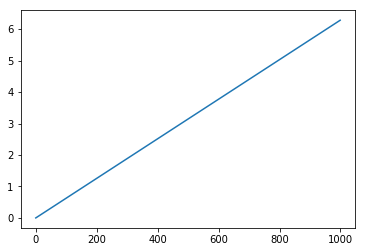

In [55]:
t = np.linspace(0, 2*np.pi, 1000, endpoint=True)
plt.plot(t)#0〜3.14*2まで単調増加

Text(0,0.5,'Amplitude ($Unit$)')

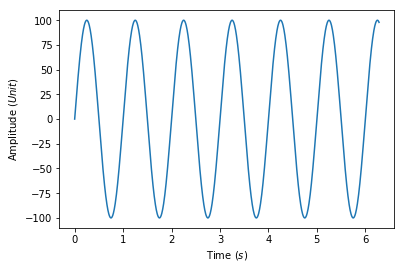

In [56]:
plt.plot(t,s)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')

## 時間領域から周波数領域へ

/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


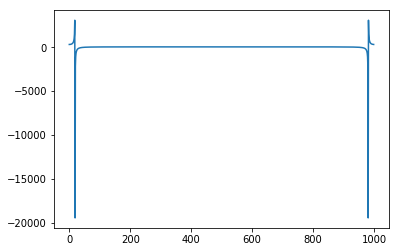

In [5]:
Y = np.fft.fft(s)
plt.plot(Y)

絶対値を取る

In [6]:
N = int(len(Y)/2+1)
print(N)
Y[N-4:N+3]

501


array([35.8278453 -3.47926591e-01j, 35.82789273-2.31947205e-01j,
       35.82792118-1.15972446e-01j, 35.82793066+2.45137244e-13j,
       35.82792118+1.15972446e-01j, 35.82789273+2.31947205e-01j,
       35.8278453 +3.47926591e-01j])

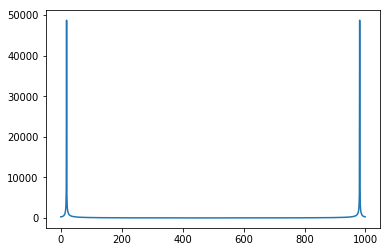

In [7]:
plt.plot(np.abs(Y))

スパイクのある場所を検出

# 振幅スペクトル

初めの半分を表示する。Nは半分の位置。

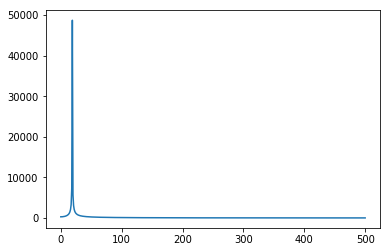

In [8]:
plt.plot(np.abs(Y[:N]))

これは時間領域信号の振幅スペクトルと呼ばれ、Chuck-Norris-Fast FFTアルゴリズムを使用した離散フーリエ変換を使用。

$x(t) = A sin(2\pi ft)+B sin(2\pi ft)$

In [49]:
t = np.linspace(0, 2*np.pi, 1000, endpoint=True)
f = 0.1 # Frequency in Hz
A = 100.0 # 振れ幅
sA = A * np.sin(2*np.pi*f*t) # Signal

In [52]:
t = np.linspace(0, 2*np.pi, 1000, endpoint=True)
f = 0.5 # Frequency in Hz
B = 200.0 # 振れ幅
sB = B * np.sin(2*np.pi*f*t) # Signal

Text(0,0.5,'Amplitude ($Unit$)')

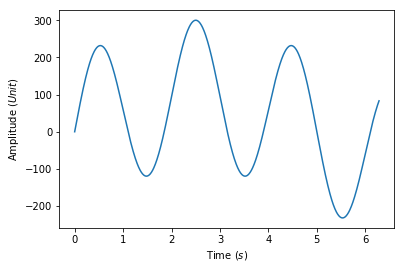

In [53]:
plt.plot(t,sA+sB)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')

In [57]:
Y = np.fft.fft(s)

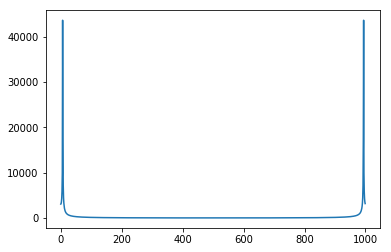

In [58]:
plt.plot(np.abs(Y))

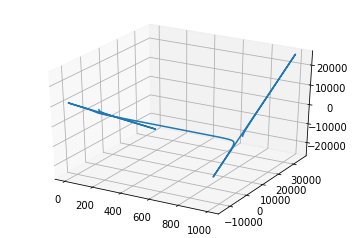

In [62]:
from mpl_toolkits.mplot3d import Axes3D
N = len(Y)
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(np.linspace(1, N, N), np.real(Y), np.imag(Y))

# Vertical Grid Load of Germany 2013

垂直グリッド負荷は、送電網から直接接続された変圧器および電力線を介して配電網および最終消費者に転送されるすべての電力の合計（正または負）です。

In [8]:
df = pd.read_csv('Vertikale_Netzlast_2013.csv', header=6, sep=';', parse_dates=[[0, 1]], index_col=0, na_values=['n.v.'])
df.rename(columns={'Unnamed: 3': 'Load'}, inplace=True)
# df.load = df.load.interpolate()

Text(0,0.5,'Power [$MW$]')

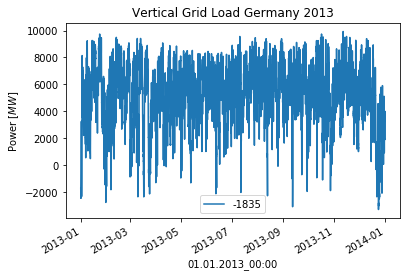

In [9]:
plt.figure(figsize=(14,5))
df.plot()
plt.title('Vertical Grid Load Germany 2013')
plt.ylabel('Power [$MW$]')

In [19]:
hann = np.hanning(len(df.values)).reshape(35043, 1) #.reshape(35043, 2)
hann = np.float32(hann)
val = np.float32(df.values[:,1]).reshape(35043, 1)
print(val.shape)
fft_x = hann*val

(35043, 1)


In [22]:
print(fft_x[:2])
print(fft_x.shape)

[[-0.000000e+00]
 [-1.447557e-05]]
(35043, 1)


In [23]:
Y = np.fft.fft(fft_x)

In [28]:
N = int(len(Y)/2+1)
fa = 1.0/(15.0*60.0) # every 15 minutes
print('fa=%.4fHz (Frequency)' % fa)

fa=0.0011Hz (Frequency)


Text(0,0.5,'vertical powergrid load ($MW$)')

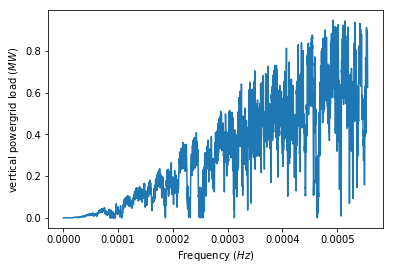

In [29]:
X = np.linspace(0, fa/2, N, endpoint=True)
plt.plot(X, 2.0*np.abs(Y[:N])/N)
plt.xlabel('Frequency ($Hz$)')
plt.ylabel('vertical powergrid load ($MW$)')

In [30]:
Xp = 1.0/X # in seconds
Xph= Xp/(60.0*60.0) # in hours

/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


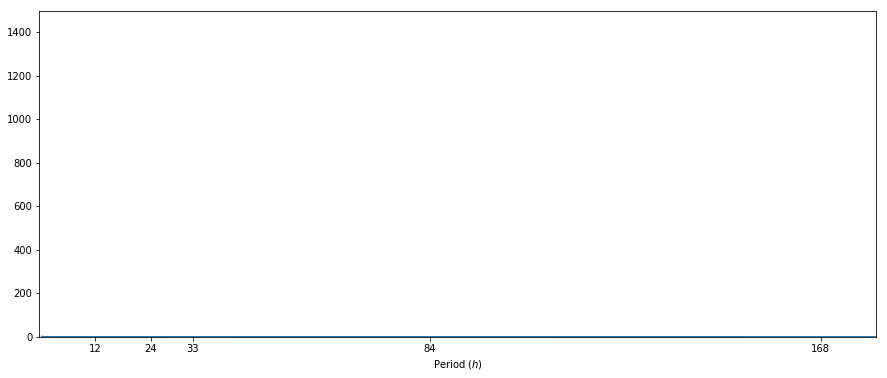

In [31]:
plt.figure(figsize=(15,6))
plt.plot(Xph, 2.0*np.abs(Y[:N])/N)
plt.xticks([12, 24, 33, 84, 168])
plt.xlim(0, 180)
plt.ylim(0, 1500)
plt.xlabel('Period ($h$)')
# plt.savefig('VerticalGridLoadGermany2013-FFT.png',bbox_inches='tight', dpi=150, transparent=True)

<hr>

## Numpyを使ったフーリエ変換

まず初めにNumpyを使ったフーリエ変換の計算方法を見ていこう．NumpyはFFTを計算するための関数 np.fft.fft2() を用意している．この関数は複素数型の配列を出力する．
    
第1引数は入力画像をグレースケール画像として与える．第2引数は出力配列のサイズを指定するが，オプションである．指定するサイズが入力画像のサイズより大きければ入力画像はFFTの計算をする前に<b>ゼロパディング</b>される．入力画像のサイズより小さければ入力画像を<b>切り取る</b>．何も指定されなければ出力配列のサイズは入力画像のサイズと同じになる．

実際に計算をしてみると，<b>周波数領域の原点(直流成分)が画像の左上の角に位置する</b>ようになる．直流成分を画像中心に移動させたければ，スペクトル全体を N/2 両方向にずらす必要がある．この移動には np.fft.fftshift() 関数を使いる(これでより解析がしやすくなる)．一度フーリエ変換を計算すれば，<b>スペクトルの大きさが分かる</b> 

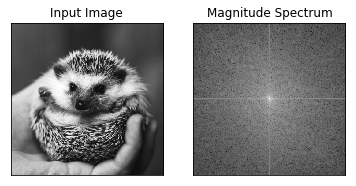

In [64]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('../../img/hari.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
#demo
#http://bigwww.epfl.ch/demo/ip/demos/FFT-filtering/

中心に白い領域が集中している事が分かる．これは画像が低周波成分をより多く含んでいることを意味する．

これでフーリエ変換を見ることができた．これにより<b>ハイパスフィルタといった周波数領域での処理</b>ができるようになる．    
<b>低周波成分に対して矩形windowを使ったマスク処理をすることによって低周波成分を取り除く</b>事ができる．それから np.fft.ifftshift() 関数を使って直流成分の位置を画像の左上に戻し、 np.ifft2() 関数を使って逆フーリエ変換を適用する．最終的な結果は複素数型の配列になるので，その絶対値をとる

In [17]:
rows, cols = img.shape
print(rows, cols)
crow,ccol = int(rows/2) , int(cols/2)
print(crow, ccol)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
print(fshift.shape)
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

500 500
250 250
(500, 500)


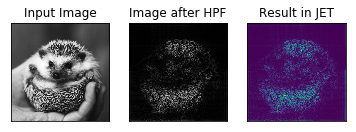

In [10]:
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

結果を見ると，<b>ハイパスフィルタによって画像中のエッジが検出</b>できていることが分かります．これは画像の勾配のチュートリアルで見た結果そのものですね．<b>画像の大半の成分が低周波領域に存在する</b>事も分かります．とにかく，これでNumpyを使って<b>離散フーリエ変換（DFT)，逆離散フーリエ変換（IDFT)</b>をする方法を学びました．次はOpenCVを使った方法を学びます．

結果を注意深く観察すると，特にJET色で描いた最後の画像を見ると，疑似輪郭(赤い矢印で示した部分です)が生じているのが分かります．<b>波のような構造が見えますが，これを リンギング効果</b> と呼びます．<b>マスク処理の際に矩形ウィンドウを使ったことが原因</b>です．このマスクはフーリエ変換によってsinc関数になるためこのような結果になってしまいます．よって，矩形ウィンドウはフィルタリングには使いません．Gaussianウィンドウなどがより適しているでしょう．

# OpenCVを使ったフーリエ変換

OpenCVはDFTを行う cv2.dft() とIDFTを行う cv2.idft() という関数を用意しています．Numpyと同様複素数型の配列を返しますが，2チャンネルの配列としてです．最初のチャンネルは結果の実部，二つ目のチャンネルが虚部に対応しています．入力画像は np.float32 型に変換される必要があります．それではどのように計算するのか見てみましょう．

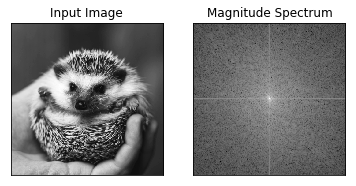

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('../../img/hari.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Note cv2.cartToPolar() 関数を使い振幅と位相の両方を取得でいます．

次にするべきはIDFTです．前セッションでハイパスフィルタを試したので，ここではローパスフィルタ(高周波成分の除去)を試しましょう．ローパスフィルタは画像にボケを加えます．まず初めに低周波領域に高い値を持ち，高周波領域が0となるマスクを作成します．

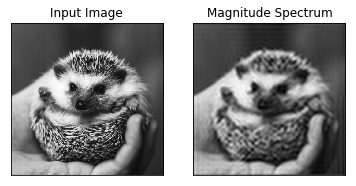

In [20]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


Note いつも通り，OpenCVの関数である cv2.dft() と cv2.idft() はNumpyの処理より高速です．しかし，Numpyの関数の方が扱いやすいインターフェースを提供しています．パフォーマンスについては次の章を読んでください．

# DFTのパフォーマンス最適化

DFTの計算に向いている配列サイズがあります．配列のサイズが2の累乗の時に最も高速に動きます．配列のサイズが2,3,5の積で表される時も効率的に計算されます．自分の実装に不安を感じるのであれば，DFTを適用する前に配列のサイズをゼロパディング等で最適なサイズに変更すると良いでしょう．OpenCVを使うのであればゼロパディングは手動で行う必要があります．一方で，NumpyであればFFTを計算する時の配列のサイズを指定すれば自動的にゼロパディングが行われます．

この最適な値をどのように計算すれば良いでしょうか?OpenCVが提供している cv2.getOptimalDFTSize() 関数を使います． cv2.dft() と np.fft.fft2() 関数のどちらにでも使えます．IPythonのmagic commandである %timeit を使ってパフォーマンスを調べてみましょう．

In [25]:
img = cv2.imread('../../img/hari.jpg',0)
rows,cols = img.shape
print(rows,cols)

500 500


In [27]:
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
print(nrows,ncols)

500 500


配列のサイズが(342,548)から(360, 576)へ変更されたのが分かるでしょうか．ゼロパディングをしてからDFTをしてみましょう．ゼロパディングをするには，全要素の値を0にした新しい配列を用意し，元の画像データをコピーします．



In [28]:
nimg = np.zeros((nrows,ncols))
nimg[:rows,:cols] = img

もしくは cv2.copyMakeBorder() 関数を使ってもゼロパディングをできます:

In [29]:
right = ncols - cols
bottom = nrows - rows
bordertype = cv2.BORDER_CONSTANT #just to avoid line breakup in PDF file
nimg = cv2.copyMakeBorder(img,0,bottom,0,right,bordertype, value = 0)

ようやくDFTを計算できます．Numpyの関数のパフォーマンスを比較してみましょう:

In [30]:
%timeit fft1 = np.fft.fft2(img)

9.62 ms ± 545 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
%timeit fft2 = np.fft.fft2(img,[nrows,ncols])

9.07 ms ± 304 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


4倍高速になりました．    
→４倍になる画像もあるのでしょう。。。
同様のパフォーマンスの計測をOpenCVでも行ってみましょう．


In [32]:
%timeit dft1= cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)

1.89 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
%timeit dft2= cv2.dft(np.float32(nimg),flags=cv2.DFT_COMPLEX_OUTPUT)

1.83 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


こちらも4倍高速化されました．OpenCVの関数を使うとNumpyの関数を使うより3倍ほど速く計算が出来ているのが分かります．逆フーリエ変換でも同じテストをしてみましょう．これはあなたの課題として残しておきます．



# 何故Laplacianがハイパスフィルタなのか?

フォーラムでも似たような質問が聞かれています．質問とは，何故Laplacianフィルタがハイパスフィルタなのか?何故Sobelフィルタがハイパスフィルタなのか?です．最初の答えはフーリエ変換の観点から説明します．Laplacianフィルタのフーリエ変換を計算し，解析してみましょう:



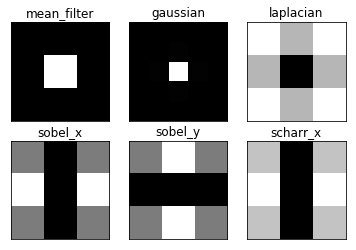

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

結果画像を見ると，各カーネルがどの周波数帯域をブロックするのか，どの周波数帯域を通過させるのか分かります．ここから上記のデモで試したカーネルはハイパスフィルタもしくはローパスフィルタのどちらかになることが分かります．



# フーリエ理論の直感的な説明

フーリエ理論は数学的にはかなり複雑です。しかし、フーリエ理論の背後には、直感的に説明するのが比較的簡単です。

## 基本原則 Basic Principles

フーリエ理論は、視覚画像のどの信号も、一連の正弦波の和として表すことができると述べている。    
画像の場合、これらは画像全体の明るさの正弦波の変化です。    
たとえば、以下に示す正弦波パターンは、１:空間周波数、2：大きさ（正または負）、および3：位相を1に符号化する1つのフーリエ項で取り込むことができます。

<img src="sin1.gif">

これらの3つの値は、正弦波画像内のすべての情報を取得します。空間周波数は、輝度が変調すると空間を横切る周波数（ここではX軸）です。例えば、以下の画像は、より高い空間周波数を有する別の正弦波を示す。

<img src="sin3.gif">

正弦波の大きさは、そのコントラスト、すなわち画像の最も暗いピークと最も明るいピークとの間の差に対応する。負の大きさはコントラスト反転を表します。つまり、明るさが暗くなります。逆も同様です。

ゼロ周波数に対応する「DC項」もあり、画像全体の平均輝度を表します。

<img src="fourier1.gif">

数学的な理由から、フーリエ変換は、原点を横切って反射される空間周波数プロットの鏡像をプロットし、空間周波数は原点から両方向に増加します。これらの2つのプロットは、常に以下のようにfと-fに同一のピークを持ち、お互いの鏡像反射です 。

<img src="fourier2.gif">

正弦波の輝度画像とその2次元フーリエ変換。フーリエ画像の各画素は空間周波数値であり、その値の大きさは画素の輝度によって符号化される。この場合、真ん中に明るいピクセルがあります。これは、正弦波のパターンをエンコードする中央の2つの明るいピクセルによって挟まれたDC項です。フーリエ画像のピークが明るいほど、輝度画像のコントラストが高くなります。この単純な画像には1つのフーリエ成分のみが存在するので、フーリエ画像の他のすべての値はゼロであり、黒色で示されている。

明るさ画像
<img src="sin3.gif">
フーリエ変換
<img src="sin3real.gif">

正弦波を表すピークが中央のDC項に近く、より低い空間周波数を示すことを除いて、以前のように3つのピークを示す2次元フーリエ変換とともに、より低い空間周波数を有する別の正弦波輝度画像がある。

明るさ画像
<img src="sin1.gif">
フーリエ変換
<img src="sin1real.gif">

正弦波の方向は、中心DC点に対するフーリエ像のピークの向きと相関する。この場合、傾いた正弦波パターンは、フーリエ画像内に傾斜した一対のピークを生成する。

明るさ画像
<img src="sin3a.gif">
フーリエ変換
<img src="sin3areal.gif">

異なるフーリエ係数は、組み合わせパターンを生成するために加算的に結合する。例えば、以下に示す正弦波画像は、上に示した傾斜した正弦波と、上に示したより低い空間周波数の垂直正弦波との和として計算される。

明るさ画像
<img src="sin3b.gif">
フーリエ変換
<img src="sin3breal.gif">

明るさ画像とフーリエ画像は、全く同じ情報を含んでいるため、完全に入れ替えることができます。

## フーリエフィルタリング

フーリエ変換を使用して、画像の空間周波数成分を調整するためのフィルタ処理をどのように行うことができるかを示す。以下に示す入力画像から始め、フーリエ変換を行った後、逆変換を行って元の画像を再構成します。この再構成された画像は、ピクセルごとに、元の輝度画像と同一である。



明るさ画像
<img src="lehar.gif">
フーリエ変換
<img src="leharreal.gif">
逆変換
<img src="lehar.gif">

変換された画像を操作して空間周波数の内容を調整し、次に逆変換を実行してフーリエフィルタリングされた画像を生成する方法を示します。<b>ローパスフィルタ、すなわち低い空間周波数成分を通過させるが、高い空間周波数をカットするフィルタ</b>から始めます。低周波成分は中央のDC点の近くにあるので、DC点の周りの半径を定義し、その半径を超えるフーリエ画像の各点をゼロにするだけです。言い換えれば、<b>ローパスフィルタ処理された変換は、フーリエ変換の中心部分</b>と同一であり、残りのフーリエ画像はゼロに設定される。このローパスフィルタ画像に適用された逆フーリエ変換は、以下に示す逆変換画像を生成する。

ローパスフィルタリング
<img src="real-lp.gif">
逆変換
<img src="filt-lp.gif">

低域フィルタリングされた画像はぼやけており、暗くて明るい低周波の広い平滑領域を保存するが、<b>鮮明な輪郭および鮮明なエッジを失う</b>ことがわかる。数学的には、ローパスフィルタリングは、光学的なぼかし機能と同等である。

次に、フーリエ画像内の半径を定義するために同じ空間周波数閾値を使用する逆ハイパスフィルタリングを試します。その半径内にあるすべての空間周波数成分は除去され、高い空間周波数成分のみが保存されます。この画像を逆変換した後、ハイパスフィルタリングの効果が見られます。ハイパスフィルタリングは、<b>元の鮮明で鮮明なエッジをすべて保存する</b>ことですが、暗い部分と明るい部分が大きく失われます。

ハイパスフィルタリング
<img src="real-hp.gif">
逆変換
<img src="filt-hp.gif">

ローパスフィルタリングされた逆変換画像が画素毎の画素にハイパス逆変換画像に加算されると、元のフィルタリングされていない画像が正確に復元される。これらの画像は相補的であり、したがって、それぞれが他から欠けている情報をコード化する。

次に<b>バンド内に収まる空間周波数のみを保存するバンドパスフィルタリング</b>を実証する。これは低いカットオフよりも大きいが、より高いカットオフよりも小さい。

バンドパスフィルタリング
<img src="real-bp1.gif">
逆変換
<img src="filt-bp1.gif">

次のシミュレーションは、空間周波数の狭い帯域を除いて上記と同じです。

バンドパスフィルタリング
<img src="real-bp2.gif">
逆変換
<img src="filt-bp2.gif">

次のシミュレーションは、より高い空間周波数帯域についてバンドパスフィルタリングを示し、

バンドパスフィルタリング
<img src="real-bp3.gif">
逆変換
<img src="filt-bp3.gif">

最後に狭い空間周波数帯域を使用することを除いて上記と同じである。

バンドパスフィルタリング
<img src="real-bp4.gif">
逆変換
<img src="filt-bp4.gif">

フーリエ表現が、変換された画像の空間的操作によって画像のグローバル情報コンテンツを操作することを可能にする、全体的に分散した方法で画像情報を符号化することを実証する。

# DFT and FFT

In [72]:
#https://qiita.com/shuhei/items/f5cf6c83fcfb5dd24c2d
#複素数計算
comp = 12 + 3j
print(comp.real)
# 12.0
print(comp.imag)
# 3.0

12.0
3.0


In [73]:
#https://algorithm.joho.info/programming/python/numpy-complex-number/
# 配列の生成
a = np.array([1+1j, 1+2j, 1+3j])
b = np.array([1+1j, 2+1j, 3+1j])

# 四則演算
print(a+b) # [ 2.+2.j  3.+3.j  4.+4.j]
print(a-b) # [ 0.+0.j -1.+1.j -2.+2.j]
print(a*b) # [ 0. +2.j  0. +5.j  0.+10.j]
print(a/b) # [ 1.0+0.j   0.8+0.6j  0.6+0.8j]

# 操作
print(np.real(a)) # 実部 [ 1.  1.  1.]
print(np.imag(a)) # 虚部 [ 1.  2.  3.]
print(np.conj(a)) # 複素共役 [ 1.-1.j  1.-2.j  1.-3.j]

[2.+2.j 3.+3.j 4.+4.j]
[ 0.+0.j -1.+1.j -2.+2.j]
[0. +2.j 0. +5.j 0.+10.j]
[1. +0. j 0.8+0.6j 0.6+0.8j]
[1. 1. 1.]
[1. 2. 3.]
[1.-1.j 1.-2.j 1.-3.j]


/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


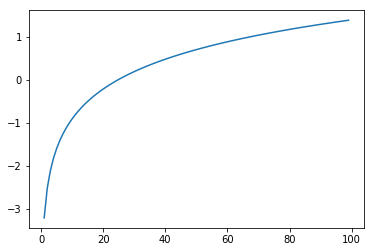

In [78]:
#対数関数 logarithmic
x = np.linspace(0, 4, 100)
plt.plot(np.log(x))

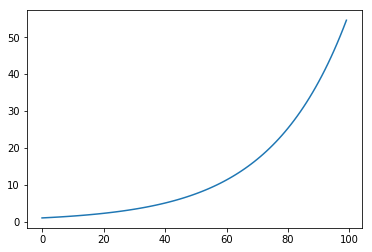

In [79]:
#指数関数 exponential
x = np.linspace(0, 4, 100)
plt.plot(np.exp(x))

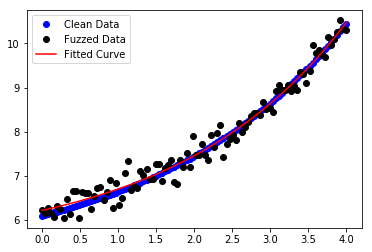

In [81]:
#曲線フィッティング exp
from scipy.optimize import curve_fit
def do_fitting():
    x = np.linspace(0, 4, 100)
    y = func(x, 1.1, .4, 5)
    y2 = y + 0.2 * np.random.normal(size=len(x))

    popt, pcov = curve_fit(func, x, y2, p0=np.array([2, 0.5, 1]))

    plt.figure()
    plt.plot(x, y, 'bo', label="Clean Data")
    plt.plot(x, y2, 'ko', label="Fuzzed Data")
    plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
    plt.legend()
    plt.show()

def func(x, a, b, c):
    return a * np.exp(x*b) + c
do_fitting()

/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


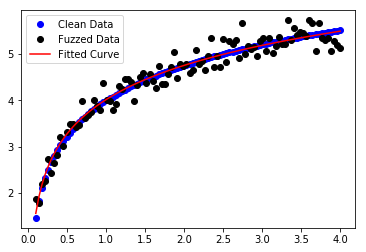

In [89]:
#曲線フィッティング lop
from scipy.optimize import curve_fit
def do_fitting():
    x = np.linspace(0.1, 4, 100)
    y = func(x, 1.1, .4, 5)
    y2 = y + 0.2 * np.random.normal(size=len(x))

    popt, pcov = curve_fit(func2, x, y2, p0 = np.array([2, 0.5, 1]))

    plt.figure()
    plt.plot(x, y, 'bo', label="Clean Data")
    plt.plot(x, y2, 'ko', label="Fuzzed Data")
    plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
    plt.legend()
    plt.show()

def func2(x, a, b, c):
    return a * np.log(x*b) + c
do_fitting()

In [88]:
x = np.linspace(0, 4, 100)
p0 = np.array([2, 0.5, 1])
print(func(x, *p0).min())
#x array is 0, you are taking the log of 0, which is equal to -inf
#you should use none zero, if you want to plot .

-inf


/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [69]:
#https://gist.github.com/bellbind/1505153
import math
def iexp(n):
    return complex(math.cos(n), math.sin(n))

def is_pow2(n):
    return False if n == 0 else (n == 1 or is_pow2(n >> 1))

def dft(xs):
    "naive dft"
    n = len(xs)
    return [sum((xs[k] * iexp(-2 * math.pi * i * k / n) for k in range(n)))
            for i in range(n)]

def dftinv(xs):
    "naive dft"
    n = len(xs)
    return [sum((xs[k] * iexp(2 * math.pi * i * k / n) for k in range(n))) / n
            for i in range(n)]

def fft_(xs, n, start=0, stride=1):
    "cooley-turkey fft"
    if n == 1: return [xs[start]]
    hn, sd = n // 2, stride * 2
    rs = fft_(xs, hn, start, sd) + fft_(xs, hn, start + stride, sd)
    for i in range(hn):
        e = iexp(-2 * math.pi * i / n)
        rs[i], rs[i + hn] = rs[i] + e * rs[i + hn], rs[i] - e * rs[i + hn]
        pass
    return rs

def fft(xs):
    assert is_pow2(len(xs))
    return fft_(xs, len(xs))

def fftinv_(xs, n, start=0, stride=1):
    "cooley-turkey fft"
    if n == 1: return [xs[start]]
    hn, sd = n // 2, stride * 2
    rs = fftinv_(xs, hn, start, sd) + fftinv_(xs, hn, start + stride, sd)
    for i in range(hn):
        e = iexp(2 * math.pi * i / n)
        rs[i], rs[i + hn] = rs[i] + e * rs[i + hn], rs[i] - e * rs[i + hn]
        pass
    return rs

def fftinv(xs):
    assert is_pow2(len(xs))
    n = len(xs)
    return [v / n for v in fftinv_(xs, n)]

In [70]:
wave = [0, 1, 2, 3, 3, 2, 1, 0]
dfreq = dft(wave)
ffreq = fft(wave)
dwave = dftinv(dfreq)
fwave= fftinv(ffreq)
print(dfreq)
print(ffreq)
print([v.real for v in dwave])
print([v.real for v in fwave])

[(12+0j), (-5.82842712474619-2.414213562373095j), (2.220446049250313e-16+7.669517010585668e-17j), (-0.17157287525381137-0.4142135623730936j), 2.449293598294704e-16j, (-0.17157287525381507+0.4142135623730959j), (-3.885780586188048e-15+2.3008551031756994e-16j), (-5.828427124746189+2.4142135623730905j)]
[(12+0j), (-5.82842712474619-2.4142135623730954j), 0j, (-0.1715728752538097-0.4142135623730947j), 0j, (-0.17157287525381015+0.41421356237309537j), 0j, (-5.82842712474619+2.414213562373095j)]
[-1.1102230246251565e-15, 1.0000000000000004, 2.0, 2.999999999999999, 3.0000000000000004, 1.9999999999999982, 1.0000000000000013, -1.1102230246251565e-16]
[0.0, 1.0000000000000002, 2.0, 3.0, 3.0, 1.9999999999999998, 1.0, 0.0]
